### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.options.mode.chained_assignment = None

### Loading the dataset

In [2]:
df=pd.read_csv("TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### EDA

In [3]:
df.shape

(50000, 8)

In [4]:
#Datatypes of columns
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
#Checking for missing values
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
num_columns=list(df.select_dtypes(exclude="O"))
num_columns

['amount',
 'longitude_of_pickup',
 'latitude_of_pickup',
 'longitude_of_dropoff',
 'latitude_of_dropoff',
 'no_of_passenger']

<AxesSubplot:>

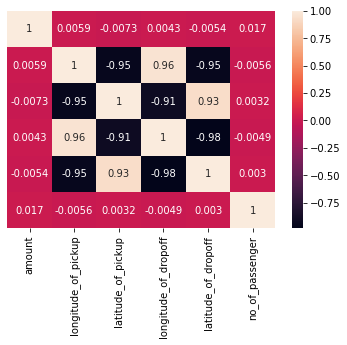

In [9]:
sns.heatmap(df[num_columns].corr(),annot=True,yticklabels=False)

In [10]:
df[df['amount']<0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
2039,37:10.0,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,57:10.0,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,39:10.0,-2.5,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,19:45.0,-2.5,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,29:46.0,-5.0,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1


In [11]:
df.drop(df[df.amount<0].index,inplace=True)
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [12]:
df.drop('unique_id',axis=1,inplace=True)

In [13]:
df["distance"]=np.nan
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,NaN
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,NaN
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,NaN
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,NaN
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,NaN
...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,NaN
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,NaN
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,NaN
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,NaN


In [14]:
#Converting latitutde and longitude to distance
df.distance=np.sqrt((df.latitude_of_pickup-df.latitude_of_dropoff)**2+(df.longitude_of_pickup-df.longitude_of_dropoff)**2)
df.drop('longitude_of_pickup',axis=1,inplace=True)
df.drop('latitude_of_pickup',axis=1,inplace=True)
df.drop('longitude_of_dropoff',axis=1,inplace=True)
df.drop('latitude_of_dropoff',axis=1,inplace=True)

In [15]:
df[['date','time','zone']]=df.date_time_of_pickup.str.split(expand=True)
df.drop('date_time_of_pickup',axis=1,inplace=True)
df

,amount,no_of_passenger,distance,date,time,zone
0,4.5,1,0.009436,2009-06-15,17:26:21,UTC
1,16.9,1,0.079696,2010-01-05,16:52:16,UTC
2,5.7,2,0.013674,2011-08-18,00:35:00,UTC
3,7.7,1,0.025340,2012-04-21,04:30:42,UTC
4,5.3,1,0.019470,2010-03-09,07:51:00,UTC
...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,23:25:15,UTC
49996,7.5,1,0.008049,2015-06-22,17:19:18,UTC
49997,6.9,1,0.020574,2011-01-30,04:53:00,UTC
49998,4.5,2,0.007686,2012-11-06,07:09:00,UTC


In [16]:
df.drop('zone',axis=1,inplace=True)
df

,amount,no_of_passenger,distance,date,time
0,4.5,1,0.009436,2009-06-15,17:26:21
1,16.9,1,0.079696,2010-01-05,16:52:16
2,5.7,2,0.013674,2011-08-18,00:35:00
3,7.7,1,0.025340,2012-04-21,04:30:42
4,5.3,1,0.019470,2010-03-09,07:51:00
...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,23:25:15
49996,7.5,1,0.008049,2015-06-22,17:19:18
49997,6.9,1,0.020574,2011-01-30,04:53:00
49998,4.5,2,0.007686,2012-11-06,07:09:00


In [17]:
df.dtypes

amount             float64
no_of_passenger      int64
distance           float64
date                object
time                object
dtype: object

In [18]:
#Converting datetime to various categories 
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['Session'] = (df['time'].dt.hour % 24 + 4) // 4
df['Session'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
df

,amount,no_of_passenger,distance,date,time,Session
0,4.5,1,0.009436,2009-06-15,2022-03-17 17:26:21,Evening
1,16.9,1,0.079696,2010-01-05,2022-03-17 16:52:16,Evening
2,5.7,2,0.013674,2011-08-18,2022-03-17 00:35:00,Late Night
3,7.7,1,0.025340,2012-04-21,2022-03-17 04:30:42,Early Morning
4,5.3,1,0.019470,2010-03-09,2022-03-17 07:51:00,Early Morning
...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-17 23:25:15,Night
49996,7.5,1,0.008049,2015-06-22,2022-03-17 17:19:18,Evening
49997,6.9,1,0.020574,2011-01-30,2022-03-17 04:53:00,Early Morning
49998,4.5,2,0.007686,2012-11-06,2022-03-17 07:09:00,Early Morning


In [19]:
df = pd.get_dummies(df, columns=['Session'])
df

,amount,no_of_passenger,distance,date,time,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon
0,4.5,1,0.009436,2009-06-15,2022-03-17 17:26:21,0,1,0,0,0,0
1,16.9,1,0.079696,2010-01-05,2022-03-17 16:52:16,0,1,0,0,0,0
2,5.7,2,0.013674,2011-08-18,2022-03-17 00:35:00,0,0,1,0,0,0
3,7.7,1,0.025340,2012-04-21,2022-03-17 04:30:42,1,0,0,0,0,0
4,5.3,1,0.019470,2010-03-09,2022-03-17 07:51:00,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-17 23:25:15,0,0,0,0,1,0
49996,7.5,1,0.008049,2015-06-22,2022-03-17 17:19:18,0,1,0,0,0,0
49997,6.9,1,0.020574,2011-01-30,2022-03-17 04:53:00,1,0,0,0,0,0
49998,4.5,2,0.007686,2012-11-06,2022-03-17 07:09:00,1,0,0,0,0,0


In [20]:
df[['year','month','day']]=df.date.str.split("-",expand=True)
df

,amount,no_of_passenger,distance,date,time,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,year,month,day
0,4.5,1,0.009436,2009-06-15,2022-03-17 17:26:21,0,1,0,0,0,0,2009,06,15
1,16.9,1,0.079696,2010-01-05,2022-03-17 16:52:16,0,1,0,0,0,0,2010,01,05
2,5.7,2,0.013674,2011-08-18,2022-03-17 00:35:00,0,0,1,0,0,0,2011,08,18
3,7.7,1,0.025340,2012-04-21,2022-03-17 04:30:42,1,0,0,0,0,0,2012,04,21
4,5.3,1,0.019470,2010-03-09,2022-03-17 07:51:00,1,0,0,0,0,0,2010,03,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-17 23:25:15,0,0,0,0,1,0,2013,06,12
49996,7.5,1,0.008049,2015-06-22,2022-03-17 17:19:18,0,1,0,0,0,0,2015,06,22
49997,6.9,1,0.020574,2011-01-30,2022-03-17 04:53:00,1,0,0,0,0,0,2011,01,30
49998,4.5,2,0.007686,2012-11-06,2022-03-17 07:09:00,1,0,0,0,0,0,2012,11,06


In [21]:
dates = pd.to_datetime({"year": df.year, "month": df.month, "day": df.day})
df["Is Weekend"] = dates.dt.day_name().isin(['Saturday', 'Sunday'])
df

,amount,no_of_passenger,distance,date,time,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,year,month,day,Is Weekend
0,4.5,1,0.009436,2009-06-15,2022-03-17 17:26:21,0,1,0,0,0,0,2009,06,15,False
1,16.9,1,0.079696,2010-01-05,2022-03-17 16:52:16,0,1,0,0,0,0,2010,01,05,False
2,5.7,2,0.013674,2011-08-18,2022-03-17 00:35:00,0,0,1,0,0,0,2011,08,18,False
3,7.7,1,0.025340,2012-04-21,2022-03-17 04:30:42,1,0,0,0,0,0,2012,04,21,True
4,5.3,1,0.019470,2010-03-09,2022-03-17 07:51:00,1,0,0,0,0,0,2010,03,09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,2022-03-17 23:25:15,0,0,0,0,1,0,2013,06,12,False
49996,7.5,1,0.008049,2015-06-22,2022-03-17 17:19:18,0,1,0,0,0,0,2015,06,22,False
49997,6.9,1,0.020574,2011-01-30,2022-03-17 04:53:00,1,0,0,0,0,0,2011,01,30,True
49998,4.5,2,0.007686,2012-11-06,2022-03-17 07:09:00,1,0,0,0,0,0,2012,11,06,False


In [22]:
df.drop(['time','year','month','day'],axis=1,inplace=True)
df

,amount,no_of_passenger,distance,date,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Is Weekend
0,4.5,1,0.009436,2009-06-15,0,1,0,0,0,0,False
1,16.9,1,0.079696,2010-01-05,0,1,0,0,0,0,False
2,5.7,2,0.013674,2011-08-18,0,0,1,0,0,0,False
3,7.7,1,0.025340,2012-04-21,1,0,0,0,0,0,True
4,5.3,1,0.019470,2010-03-09,1,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,0,0,0,0,1,0,False
49996,7.5,1,0.008049,2015-06-22,0,1,0,0,0,0,False
49997,6.9,1,0.020574,2011-01-30,1,0,0,0,0,0,True
49998,4.5,2,0.007686,2012-11-06,1,0,0,0,0,0,False


In [23]:
# df["Is Weekend"]=df["Is Weekend"].replace('True',1,inplace=True)
# df

In [24]:
df = pd.get_dummies(df, columns=['Is Weekend'])
df

,amount,no_of_passenger,distance,date,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Is Weekend_False,Is Weekend_True
0,4.5,1,0.009436,2009-06-15,0,1,0,0,0,0,1,0
1,16.9,1,0.079696,2010-01-05,0,1,0,0,0,0,1,0
2,5.7,2,0.013674,2011-08-18,0,0,1,0,0,0,1,0
3,7.7,1,0.025340,2012-04-21,1,0,0,0,0,0,0,1
4,5.3,1,0.019470,2010-03-09,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,0,0,0,0,1,0,1,0
49996,7.5,1,0.008049,2015-06-22,0,1,0,0,0,0,1,0
49997,6.9,1,0.020574,2011-01-30,1,0,0,0,0,0,0,1
49998,4.5,2,0.007686,2012-11-06,1,0,0,0,0,0,1,0


In [25]:
df.rename(columns={'Is Weekend_True': 'Weekend', 'Is Weekend_False': 'Weekday'}, inplace=True)
df

,amount,no_of_passenger,distance,date,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Weekday,Weekend
0,4.5,1,0.009436,2009-06-15,0,1,0,0,0,0,1,0
1,16.9,1,0.079696,2010-01-05,0,1,0,0,0,0,1,0
2,5.7,2,0.013674,2011-08-18,0,0,1,0,0,0,1,0
3,7.7,1,0.025340,2012-04-21,1,0,0,0,0,0,0,1
4,5.3,1,0.019470,2010-03-09,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,2013-06-12,0,0,0,0,1,0,1,0
49996,7.5,1,0.008049,2015-06-22,0,1,0,0,0,0,1,0
49997,6.9,1,0.020574,2011-01-30,1,0,0,0,0,0,0,1
49998,4.5,2,0.007686,2012-11-06,1,0,0,0,0,0,1,0


In [26]:
df.shape

(49994, 12)

In [27]:
df.drop(['date','Weekend'],axis=1,inplace=True)
df

,amount,no_of_passenger,distance,Session_Early Morning,Session_Evening,Session_Late Night,Session_Morning,Session_Night,Session_Noon,Weekday
0,4.5,1,0.009436,0,1,0,0,0,0,1
1,16.9,1,0.079696,0,1,0,0,0,0,1
2,5.7,2,0.013674,0,0,1,0,0,0,1
3,7.7,1,0.025340,1,0,0,0,0,0,0
4,5.3,1,0.019470,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,0,0,0,0,1,0,1
49996,7.5,1,0.008049,0,1,0,0,0,0,1
49997,6.9,1,0.020574,1,0,0,0,0,0,0
49998,4.5,2,0.007686,1,0,0,0,0,0,1


<AxesSubplot:>

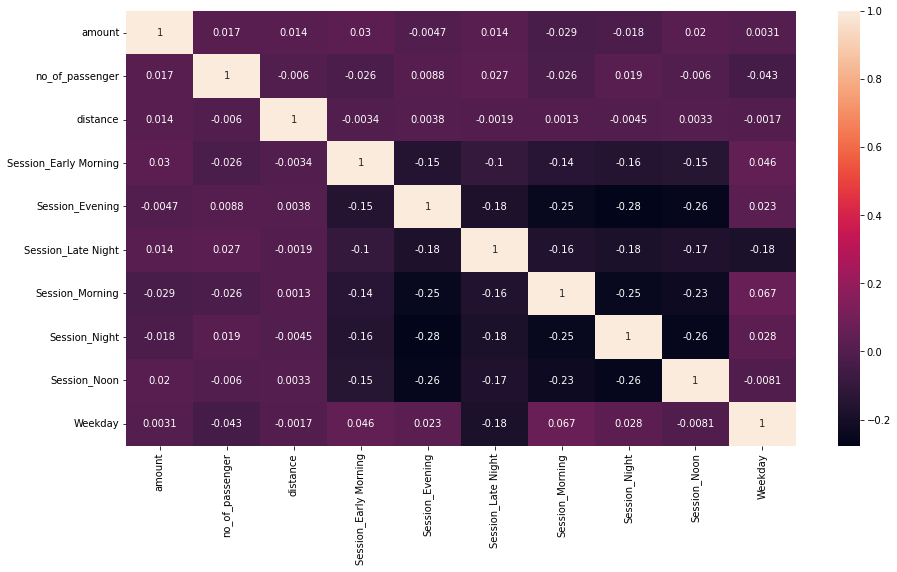

In [28]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = df.corr(), annot = True)

In [29]:
X = df.drop(["amount"], axis=1)
Y = df[['amount']]

### Fitting the model

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

### Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [32]:
model.score(X_train, Y_train)

0.0025148731514834655

In [33]:
model.score(X_test, Y_test)

0.0032682428483932213

### Decision Tree

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop("amount", axis = 1)
X = scaler.fit_transform(x)
Y = df["amount"]
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dTree = DecisionTreeRegressor()
dTree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [37]:
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

0.8614546932014803
0.606262647857206


### Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
# fit the regressor with x and y data

In [39]:
regressor.fit(X_train, Y_train)
#Train data
regressor.score(X_train,Y_train)*100

84.64029694175777

In [40]:
#Test Data
regressor.score(X_test,Y_test)*100

71.11488725585401